# Assignment 5
The goal is to test a pre-trained Faster R-CNN on some picture from the coco dataset.
Follow these steps:
1. Download the file „2017 Val images [5/1GB]“ and „ 2017 Train/Val annotations [241MB]“ from
the Coco page. You can use the library pycocotools to load them into your notebook.
2. Randomly select 10 images from this dataset.
3. Use a pre-trained version of Faster R-CNN (Resnet50 backbone) to predict the bounding box
of objects on the 10 images. Only keep regions that have a score > 0.8.
4. Visualize the predicted bounding boxes and label together with the ground truth bounding
boxes and label. Show all 10 pairs of images side by side in the jupyter notebook.
5. Repeat the steps from above using a Mobilenet backbone for the Faster R-CNN.
6. Wich backbone delivers the better results? Calculate the IoU for both approaches.

In [47]:

# CNN 
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn

# others
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
import time
import random

# torchvision
import torchvision
import torchvision.transforms as transforms

# dataset 
from pycocotools.coco import COCO
import cv2


cudnn.benchmark = True
plt.ion()   # interactive mode

# Task 1 
1. Download the file „2017 Val images [5/1GB]“ and „ 2017 Train/Val annotations [241MB]“ from
the Coco page. You can use the library pycocotools to load them into your notebook.

In [48]:
cocoRoot = "../../Data/Coco/"
dataType = "val2017"

annFile = os.path.join(cocoRoot, f'annotations/instances_{dataType}.json')
print(f'Annotation file: {annFile}')

Annotation file: ../../Data/Coco/annotations/instances_val2017.json


In [49]:
# # initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.44s)
creating index...
index created!


In [50]:
# the category id of person is 1, which means we only setup the class cat which have persion 
ids = coco.getCatIds('person')[0]
imgIds = coco.getImgIds(catIds=[ids])
print(f'The number of images contains person: {len(imgIds)}')


The number of images contains person: 2693


In [51]:
id = coco.getCatIds(['dog'])[0]
imgIds = coco.catToImgs[id]
print(f'The number of images that includes dogs have：{len(imgIds)}, which are:')
print(imgIds)

The number of images that includes dogs have：218, which are:
[289343, 61471, 472375, 520301, 579321, 494869, 554002, 78823, 419974, 404484, 329219, 68078, 170893, 65485, 498286, 424162, 61108, 67213, 365207, 131273, 279278, 7386, 139099, 554291, 482917, 88951, 60835, 261161, 129756, 267300, 169076, 546829, 209613, 224200, 205834, 432553, 225184, 372819, 452891, 76417, 366884, 291664, 29393, 377575, 129756, 209613, 432553, 372819, 366884, 209613, 372819, 372819, 78565, 171611, 489014, 193162, 361571, 532575, 190140, 79229, 407083, 415990, 219578, 161609, 311190, 241326, 474164, 117525, 189806, 246454, 286422, 235399, 236166, 126110, 140203, 392818, 53529, 288685, 305343, 193162, 246454, 375278, 532530, 251572, 81766, 401991, 49269, 206831, 139872, 412240, 22192, 71226, 505573, 237864, 292330, 534270, 222317, 318908, 347930, 89880, 89880, 170278, 225670, 486479, 30494, 554579, 549220, 555005, 399655, 185250, 309484, 80153, 273642, 446522, 329447, 389933, 145781, 575357, 462728, 273232, 4

In [52]:
coco.anns

{1768: {'segmentation': [[510.66,
    423.01,
    511.72,
    420.03,
    510.45,
    416.0,
    510.34,
    413.02,
    510.77,
    410.26,
    510.77,
    407.5,
    510.34,
    405.16,
    511.51,
    402.83,
    511.41,
    400.49,
    510.24,
    398.16,
    509.39,
    397.31,
    504.61,
    399.22,
    502.17,
    399.64,
    500.89,
    401.66,
    500.47,
    402.08,
    499.09,
    401.87,
    495.79,
    401.98,
    490.59,
    401.77,
    488.79,
    401.77,
    485.39,
    398.58,
    483.9,
    397.31,
    481.56,
    396.35,
    478.48,
    395.93,
    476.68,
    396.03,
    475.4,
    396.77,
    473.92,
    398.79,
    473.28,
    399.96,
    473.49,
    401.87,
    474.56,
    403.47,
    473.07,
    405.59,
    473.39,
    407.71,
    476.68,
    409.41,
    479.23,
    409.73,
    481.56,
    410.69,
    480.4,
    411.85,
    481.35,
    414.93,
    479.86,
    418.65,
    477.32,
    420.03,
    476.04,
    422.58,
    479.02,
    422.58,
    480.29,
    423.01,

Image infomation 401446：
{'license': 1, 'file_name': '000000401446.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000401446.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-17 16:37:02', 'flickr_url': 'http://farm9.staticflickr.com/8226/8594006748_3b25699ef0_z.jpg', 'id': 401446}
../../Data/Coco/val2017/000000401446.jpg


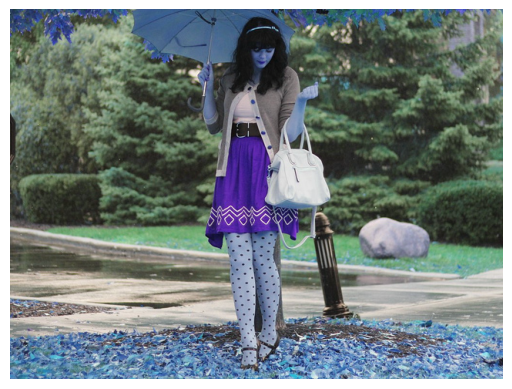

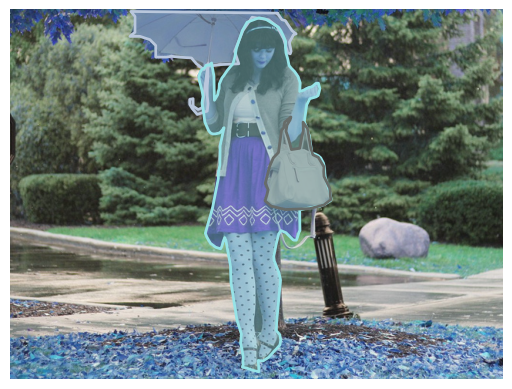

In [60]:
imgId = imgIds[10]

imgInfo = coco.loadImgs(imgId)[0]
print(f'Image infomation {imgId}：\n{imgInfo}')

imPath = os.path.join(cocoRoot, dataType, imgInfo['file_name'])    
print(imPath)            
im = cv2.imread(imPath)
plt.axis('off')
plt.imshow(im)
plt.show()


plt.imshow(im); plt.axis('off')

annIds = coco.getAnnIds(imgIds=imgInfo['id'])
anns = coco.loadAnns(annIds)

coco.showAnns(anns)


Image information 401446:
{'license': 1, 'file_name': '000000401446.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000401446.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-17 16:37:02', 'flickr_url': 'http://farm9.staticflickr.com/8226/8594006748_3b25699ef0_z.jpg', 'id': 401446}
../../Data/Coco/val2017/000000401446.jpg


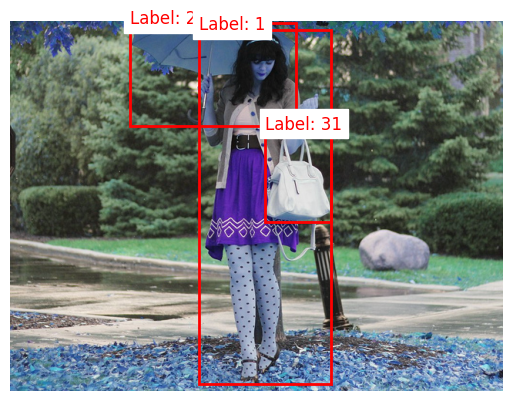

In [62]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

imgId = imgIds[10]

imgInfo = coco.loadImgs(imgId)[0]
print(f'Image information {imgId}:\n{imgInfo}')

imPath = os.path.join(cocoRoot, dataType, imgInfo['file_name'])    
print(imPath)            
im = cv2.imread(imPath)

plt.axis('off')
plt.imshow(im)

# 加入 bounding boxes 和 labels
annIds = coco.getAnnIds(imgIds=imgInfo['id'])
anns = coco.loadAnns(annIds)

for ann in anns:
    bbox = ann['bbox']
    label = ann['category_id']
    x, y, w, h = bbox
    rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)  # 將矩形添加到當前的圖中
    plt.text(x, y, f'Label: {label}', fontsize=12, color='r', backgroundcolor='w')

plt.show()


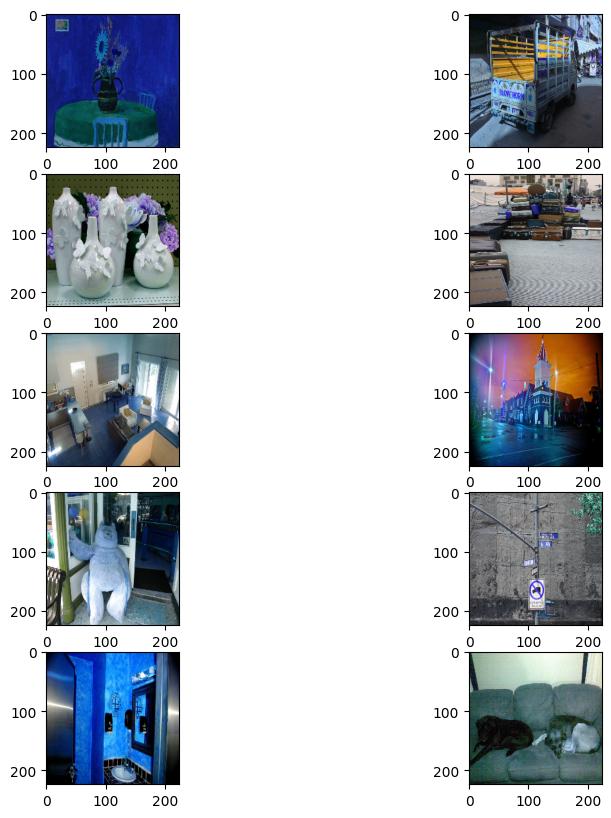

[tensor([[[ 37,  48, 153],
          [  9,  47, 159],
          [ 24,  42, 146],
          ...,
          [  9,  30, 122],
          [ 20,  30, 125],
          [ 23,  33, 123]],
 
         [[ 36,  63, 170],
          [ 23,  41, 156],
          [ 31,  46, 152],
          ...,
          [ 21,  27, 114],
          [ 21,  30, 120],
          [ 18,  31, 120]],
 
         [[ 17,  39, 147],
          [ 28,  39, 152],
          [ 37,  43, 148],
          ...,
          [ 27,  26, 115],
          [ 18,  28, 118],
          [ 17,  27, 116]],
 
         ...,
 
         [[ 49,  46, 145],
          [ 28,  50, 148],
          [ 31,  46, 137],
          ...,
          [  8,  24,  76],
          [  4,  24,  95],
          [ 29,  34, 113]],
 
         [[ 25,  39, 135],
          [ 27,  40, 145],
          [ 19,  35, 133],
          ...,
          [ 23,  30,  82],
          [ 27,  39,  93],
          [ 15,  55, 106]],
 
         [[ 56,  86, 148],
          [ 35,  47, 129],
          [ 51,  66, 133],
   

In [54]:
def selected_10_images():
    all_images = [] 
    target_size = (224, 224)  # 調整的目標大小
    fig, axes = plt.subplots(5, 2, figsize=(10, 10))  # 創建 5x2 的 Matplotlib 子圖結構
    
    for i in range(10):
        imgIds = coco.getImgIds()
        img_id = random.choice(imgIds)
        imgInfo = coco.loadImgs(img_id)[0]
        imPath = os.path.join(cocoRoot, dataType, imgInfo['file_name'])
        im = cv2.imread(imPath)
        im = cv2.resize(im, target_size)
        all_images.append(torch.from_numpy(im))
        
        row = i // 2 
        col = i % 2 
        axes[row, col].imshow(im)
    
    plt.show()
    return all_images

selected_10_images()

Image infomation 401446：
{'license': 1, 'file_name': '000000401446.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000401446.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-17 16:37:02', 'flickr_url': 'http://farm9.staticflickr.com/8226/8594006748_3b25699ef0_z.jpg', 'id': 401446}
../../Data/Coco/val2017/000000401446.jpg


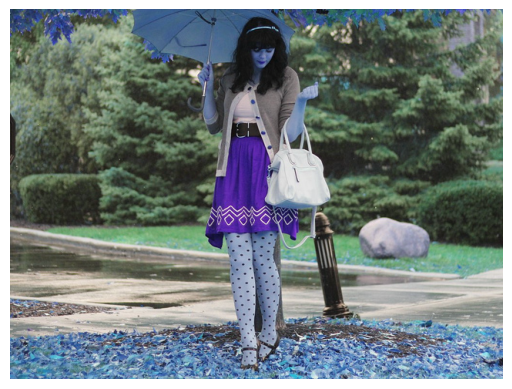

In [55]:
imgId = imgIds[10]

imgInfo = coco.loadImgs(imgId)[0]
print(f'Image infomation {imgId}：\n{imgInfo}')

imPath = os.path.join(cocoRoot, dataType, imgInfo['file_name'])    
print(imPath)            
im = cv2.imread(imPath)
plt.axis('off')
plt.imshow(im)
plt.show()


In [56]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)  

# show images
imshow(torchvision.utils.make_grid(images)) # 將多個圖像合併成一個網格以便顯示。
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

NameError: name 'trainloader' is not defined